### 1.1 Least squares
- calculate intercept and slope by least squares according to data
- L represents the sum of the square distance between data and the line

$$
L:=\sum_{i=1}^{N}(y_i-\beta_0-\beta_1x_i)^2
$$

- Partially differentiate L by $\beta_0$ and $\beta_1$

$$
  \frac{\partial L}{\partial \beta_0} = 
  -2\sum_{i=1}^{N}(y_i-\beta_0-\beta_1x_i)=
  0
$$

$$
  \frac{\partial L}{\partial \beta_1} = 
  -2\sum_{i=1}^{N}x_i(y_i-\beta_0-\beta_1x_i)=
  0
$$

- By calculating the equations above, we can acquire equations below

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{N}(x_i-\bar{x})(y_i-\bar{y})}{\sum_{i=1}^{N}(x_i-\bar{x})^2}
$$

$$
\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}
$$

- If we assume $\beta_0 = 0$, we can calculate $\beta_1$ as below

$$
\hat{\beta_1} = \frac{\sum_{i=1}^{N}x_iy_i}{\sum_{i=1}^{N}x_i^2}
$$

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.datasets import load_boston
%matplotlib inline


def min_sq(x, y):
    x_bar, y_bar = np.mean(x), np.mean(y)
    beta_1 = np.dot(x - x_bar, y - y_bar) / np.linalg.norm(x - x_bar) ** 2
    beta_0 = y_bar - beta_1 * x_bar
    return beta_1, beta_0

In [2]:
N = 100
a = np.random.normal(loc=2, scale=1, size=N)
b = np.random.randn(1)
x = np.random.randn(N)
y = a*x + b + np.random.randn(N)
a1, b1 = min_sq(x, y)
xx = x-np.mean(x)
yy = y-np.mean(y)
a2, b2=min_sq(xx, yy)

In [3]:
a2, b2

(2.0762415639973884, -1.4759766729037052e-16)

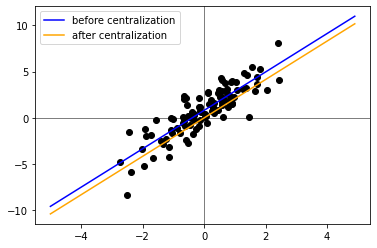

In [4]:
x_seq = np.arange(-5, 5, 0.1)
y_pre = x_seq*a1+b1
yy_pre=x_seq*a2+b2
plt.scatter(x, y, c="black")
plt.axhline(y=0, c="black", linewidth=0.5)
plt.axvline(x=0, c="black", linewidth=0.5)
plt.plot(x_seq, y_pre, c="blue", label="before centralization")
plt.plot(x_seq, yy_pre, c="orange", label="after centralization")
plt.legend(loc="upper left")

### 1.2 Multiple Regression

$$
y := \left[\begin{array}{c}
y_1 \\
\vdots \\
y_N\end{array}\right]
$$

$$
\boldsymbol{X}=
\left[\begin{array}{ccc}
1 & x_2 \\
\vdots & \vdots \\
1 & x_N\end{array}\right]
$$

$$
\beta = \left[\begin{array}{c}
\beta_0\\
\beta_1 \\
\end{array}\right]
$$

Based on
$$L := \sum_{i=1}^{N}(y_i-\beta_0-x_{i, 1}\beta_1)^2$, $L = ||y-\boldsymbol{X}\beta||^2
$$ and
$$\nabla L := \left[\begin{array}{c}\frac{\partial}{\partial \beta_1} \\
\frac{\partial}{\partial \beta_1}
\end{array}\right]
= -2\boldsymbol{X}^T(y-X\beta)
$$

In [5]:
n = 100
p = 2
beta = np.array([1, 2, 3])
x = np.random.randn(n, 2)
y = beta[0]+beta[1]*x[:, 0]+beta[2]*x[:, 1]+np.random.randn(n)
X = np.insert(x, 0, 1, axis=1)
np.linalg.inv(X.T@X)@X.T@y

array([0.88900072, 1.95768706, 2.96985316])

chi square distribution

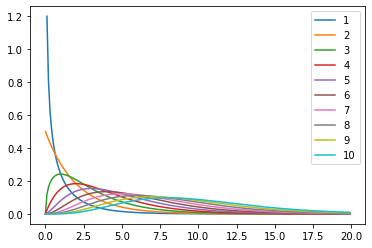

In [16]:
x = np.arange(0, 20, 0.1)
for i in range(1, 11):
    plt.plot(x, stats.chi2.pdf(x, i), label=f"{i}")
plt.legend(loc="upper right")

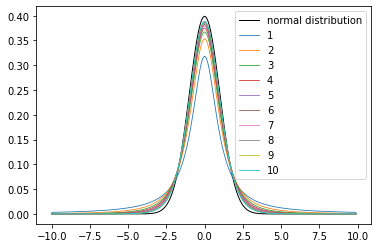

In [18]:
x = np.arange(-10, 10, 0.1)
plt.plot(x, stats.norm.pdf(x, 0, 1), label="normal distribution", c="black", linewidth=1)
for i in range(1, 11):
    plt.plot(x, stats.t.pdf(x, i), label=f"{i}", linewidth=0.8)
plt.legend(loc="upper right")

Text(0, 0.5, 'beta_1')

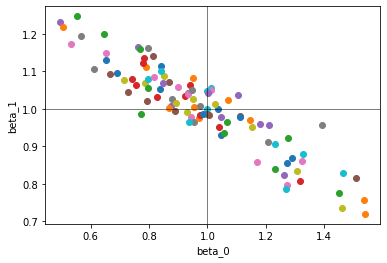

In [20]:
N = 100
p = 1
iter_num = 100
for i in range(iter_num):
    x = np.random.randn(N)+2
    e = np.random.randn(N)
    y = x+1+e
    b_1, b_0 = min_sq(x, y)
    plt.scatter(b_0, b_1)
plt.axhline(y=1.0, c="black", linewidth=0.5)
plt.axvline(x=1.0, c="black", linewidth=0.5)
plt.xlabel("beta_0")
plt.ylabel("beta_1")

In [21]:
N = 100
np.random.randn(N)
y = np.random.randn(N)
beta_1, beta_0= min_sq(x, y)
RSS = np.linalg.norm(y-beta_0-beta_1*x)**2
RSE = np.sqrt(RSS/(N-1-1))
B_0 = (x.T@x/N)/np.linalg.norm(x-np.mean(x))**2
B_1 = 1/np.linalg.norm(x-np.mean(x))**2
se_0 = RSE*np.sqrt(B_0)
se_1 = RSE*np.sqrt(B_1)
t_0 = beta_0 / se_0
t_1 = beta_1 / se_1
p_0 = 2*(stats.t.cdf(np.abs(t_0), N-2))
p_1 = 2*(stats.t.cdf(np.abs(t_1), N-2))

In [23]:
print(beta_0, se_0, t_0, p_0)
print(beta_1, se_1, t_1, p_1)

0.25203397331542626 0.2238286630315041 1.1260129507182566 1.737090051621419
-0.0998858811528081 0.1010559344545062 -0.9884217259677626 1.674619697663179


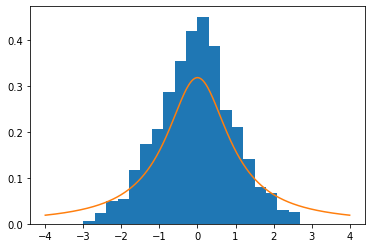

In [24]:
N = 100
r = 1000
T = []
for i in range(r):
    x = np.random.randn(N)
    y = np.random.randn(N)
    beta_1, beta_0 = min_sq(x, y)
    pre_y = beta_0 + beta_1 * x
    RSS = np.linalg.norm(y-beta_0-beta_1*x)**2
    RSE = np.sqrt(RSS/(N-1-1))
    B_0 = (x.T@x/N)/np.linalg.norm(x-np.mean(x)) ** 2
    B_1 = 1/np.linalg.norm(x-np.mean(x)) ** 2
    se_1 = RSE*np.sqrt(B_1)
    T.append(beta_1/se_1)
plt.hist(T, bins=20, range=(-3, 3), density=True)
x = np.linspace(-4, 4, 400)
plt.plot(x, stats.t.pdf(x, 1))

In [25]:
def R2(x, y):
    n = x.shape[0]
    xx = np.insert(x, 0, 1, axis=1)
    beta = np.linalg.inv(xx.T@xx)@xx.T@y
    y_hat = xx@beta
    y_bar = np.mean(y)
    RSS = np.linalg.norm(y-y_hat)**2
    TSS = np.linalg.norm(y-y_bar)**2
    return 1-RSS/TSS

In [26]:
N = 100
m = 2
x = np.random.randn(N, m)
y = np.random.randn(N)
R2(x, y)

0.010004921957966983

In [28]:
boston = load_boston()
x = boston.data

In [29]:
def VIF(x):
    p = x.shape[1]
    values = []
    for j in range(p):
        S = list(set(range(p))-{j})
        values.append(1/(1-R2(x[:, S], x[:, j])))
    return values

In [32]:
N = 100
p = 1
X = np.random.randn(N, p)
X = np.insert(X, 0, 1, axis=1)
beta = np.array([1, 1])
epsilon = np.random.randn(N)
y = X@beta + epsilon
U = np.linalg.inv(X.T@X)
beta_hat = U@X.T@y
RSS = np.linalg.norm(y-X@beta_hat)**2
RSE = np.sqrt(RSS/(N-p-1))
alpha=0.05

In [35]:
def f(x, a):
    x = np.array([1, x])
    range = stats.t.ppf(0.975, df=N-p-1)*RSE*np.sqrt(a+x@U@x.T)
    lower = x@beta_hat-range
    upper = x@beta_hat+range
    return lower, upper

In [39]:
x_seq = np.arange(-10, 10, 0.1)
lower_seq1 = []
upper_seq1 = []
for i in range(len(x_seq)):
    lower, upper = f(x_seq[i], 0)
    lower_seq1.append(lower)
    upper_seq1.append(upper)
lower_seq2 = []
upper_seq2 = []
for i in range(len(x_seq)):
    lower, upper = f(x_seq[i], 1)    
    lower_seq2.append(lower)
    upper_seq2.append(upper)
yy = beta_hat[0]+beta_hat[1]*x_seq

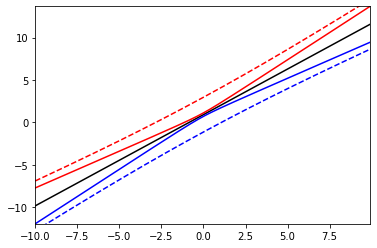

In [40]:
plt.xlim(np.min(x_seq), np.max(x_seq))
plt.ylim(np.min(lower_seq1), np.max(upper_seq1))
plt.plot(x_seq, yy, c="black")
plt.plot(x_seq, lower_seq1, c="blue")
plt.plot(x_seq, upper_seq1, c="red")
plt.plot(x_seq, lower_seq2, c="blue", linestyle="dashed")
plt.plot(x_seq, upper_seq2, c="red", linestyle="dashed")